In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.python.keras import activations
from tensorflow.python.keras.activations import softmax
from tensorflow.python.keras.metrics import accuracy

In [36]:
data=tf.keras.datasets.mnist

In [37]:
(x_train,y_train),(x_test,y_test)=data.load_data()

In [38]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [85]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [86]:
model=tf.keras.models.Sequential()
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)) 


In [87]:
# # Creating a neural network now
# model = Sequential()
# #First convolution layer 0 1 2 3 (60000,28,28,1) 28-3+1=26 26*26
# model.add(Conv2D(64,(3,3), input_shape=x_train.shape[1:])) #only for first convulation layer to mention inpur size
# model.add(Activation("relu")) #activation function to make it non linear,values <0 are removed
# model.add(MaxPooling2D(pool_size=(2,2))) #Maxpooling single maximum value of (2*2)

# #second convolution layer
# model.add(Conv2D(64,(3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))
          
# #Third convolution layer
# model.add(Conv2D(64,(3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))
          
# #Fully connected layer #1
# model.add(Flatten()) #Before using Fully connected layer need to flatten bcz 2D to 1D
# model.add(Dense(64))
# model.add(Activation("relu"))
          
# #Fully Connected layer #2
# model.add(Dense(32))
# model.add(Activation("relu"))
          
# #Last Fully Connected layer ,Output must be equal to number of classes ,10(0 to 9)
# model.add(Dense(10)) # last layer dense must be equal to 10
# model.add(Activation("softmax")) #activation function is changed to softmax (gives class probablities)
# # Binary classification, one neuron in ecah layer,sigmoid

In [88]:
model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [114]:
model.fit(x_train,y_train,epochs=30)

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0522 - accuracy: 0.9833
Epoch 2/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0381 - accuracy: 0.9876
Epoch 3/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0319 - accuracy: 0.9896
Epoch 4/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0249 - accuracy: 0.9920
Epoch 5/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0197 - accuracy: 0.9930
Epoch 6/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0168 - accuracy: 0.9941
Epoch 7/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0145 - accuracy: 0.9953
Epoch 8/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0133 - accuracy: 0.9951
Epoch 9/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0126 - accuracy: 0.9958
Epoch 10/30
1875/1875 [==============================] - 10s 6ms/step - lo

In [115]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2207 - accuracy: 0.9717


In [116]:
print(accuracy)
print(loss)

0.9717000126838684
0.22074677050113678


In [117]:
model.save('digits.model')

INFO:tensorflow:Assets written to: digits.model\assets


In [119]:
predictions=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [120]:
print(predictions)

[[1.6651952e-20 8.1480890e-20 2.0377549e-16 ... 1.0000000e+00
  9.2499203e-19 1.7934057e-14]
 [0.0000000e+00 8.3683213e-25 1.0000000e+00 ... 1.7464814e-35
  2.2906732e-38 0.0000000e+00]
 [2.4308075e-19 1.0000000e+00 2.1413183e-14 ... 5.6149780e-14
  4.1297946e-12 1.7485489e-19]
 ...
 [6.4975858e-35 4.2262429e-25 1.3493494e-28 ... 5.9123712e-21
  1.4702242e-21 5.7896613e-21]
 [1.1258126e-27 1.0400336e-23 2.3354035e-26 ... 2.8415899e-25
  2.6247404e-13 3.9511047e-33]
 [1.7338778e-25 1.5230773e-33 1.3771318e-31 ... 1.3352902e-33
  1.0523368e-24 1.3754921e-26]]


In [121]:
print(np.argmax(predictions[0])) 

7


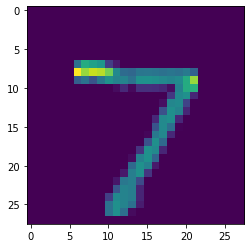

In [169]:
plt.imshow(x_test[0])

In [172]:
# print(np.argmax(predictions[219]))

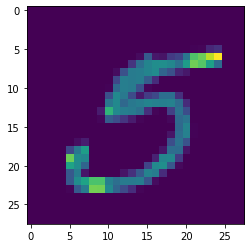

In [173]:
plt.imshow(x_test[219])

In [186]:
img=cv2.imread("Seven.png")

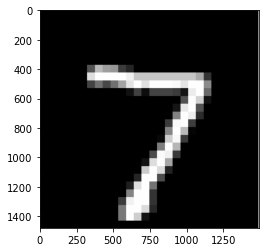

In [187]:
plt.imshow(img)

In [188]:
img.shape

(1480, 1490, 3)

In [189]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [190]:
gray.shape

(1480, 1490)

In [191]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [192]:
resized.shape

(28, 28)

In [193]:
newimg=tf.keras.utils.normalize(resized,axis=1)

In [194]:
newimg=np.array(newimg).reshape(-1,28,28,1)

In [195]:
newimg.shape

(1, 28, 28, 1)

In [196]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 35ms/step


In [197]:
print(np.argmax(predictions))

7
